**0. Import & parse CSV data**

In [8]:
%matplotlib inline

In [3]:
import numpy as np
from matplotlib.pylab import plot, legend
import pandas as pd

In [16]:
# read trends.csv with pandas. The first line is the header: 
## week_start,week_end,textbooks,spring_break,kayak,skiing,global_warming
## 2004-01-04,2004-01-10,65,36,17,85,13
## 2004-01-11,2004-01-17,79,40,18,84,18


# Giving it index_col=0 uses the week_start as the index 
# and parse_dates=True parses them as a date.
df = pd.read_csv('trends.csv',index_col=0,parse_dates=True)

Let's take a look at the first few entries of the pandas dataframe to see how it looks:

In [24]:
df.head()

week_end  textbooks  spring_break  kayak  skiing  global_warming
week_start                                                                    
2004-01-04  2004-01-10         65            36     17      85              13
2004-01-11  2004-01-17         79            40     18      84              18
2004-01-18  2004-01-24         56            44     18      77              14
2004-01-25  2004-01-31         39            43     18      75              15
2004-02-01  2004-02-07         28            41     16      63              16

NB: In the table above it looks like the first row is "week_start" followed by a bunch of blank entries, but in fact this is just showing that the label for the indices is called "week_start". We can grab the first row of the data frame to verify this:

In [22]:
print df.iloc[0]

week_end          2004-01-10
textbooks                 65
spring_break              36
kayak                     17
skiing                    85
global_warming            13
Name: 2004-01-04 00:00:00, dtype: object


I. Plot trends in single frame, with legend

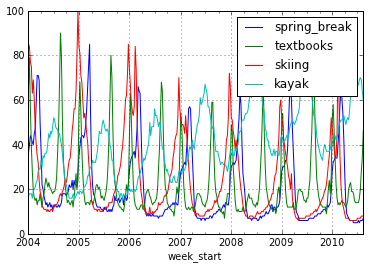

In [9]:
df.spring_break.plot()
df.textbooks.plot()
df.skiing.plot()
df.kayak.plot()
legend()

In [26]:
# Let’s look at some summary statistics:
df.describe()

textbooks  spring_break       kayak      skiing  global_warming
count  346.000000     346.00000  346.000000  346.000000      346.000000
mean    22.263006      20.34104   40.343931   25.158960       26.057803
std     15.208032      16.50224   14.900255   20.202616       15.060347
min      7.000000       5.00000   15.000000    6.000000        5.000000
25%     13.000000       8.25000   29.000000   10.000000       16.250000
50%     16.000000      13.00000   39.000000   16.000000       22.000000
75%     23.000000      30.00000   51.000000   36.000000       31.000000
max     90.000000      85.00000   76.000000  100.000000       82.000000

**II. Determine maxima and minima of each trend term**

Determine in which week of each year (for all five search trends including "global warming") that search reached its peak and its minimum.

We can query the pandas data frame to return to us all values where a year is a particular value

In [29]:
trend = df.global_warming
for yr in range(2004,2011):
    sub_df = df[df.index.yr == yr]
    print sub_df[trend == max(trend)]

AttributeError: 'DatetimeIndex' object has no attribute 'yr'

In [116]:
dates = trends.week_start
yrs = zeros_like(dates)
wks = zeros_like(dates)
for i in range(len(dates)):
    yrs[i] = dates[i].year
    wks[i] = dates[i].isocalendar()[1]

For each year, list week numbers corresponding to maximum and minimum search values

In [117]:
trend = trends.global_warming
for yr in range(2004,2011):
    idx = find(yrs==yr)
    print yr, wks[find(trend[idx] == max(trend[idx]))], wks[find(trend[idx] == min(trend[idx]))]

**III. Study scatter about median values**

Q: Is it true that $\sigma(A) > \sigma(B) \Rightarrow \sigma_\textrm{median}(A) > \sigma_\textrm{median}(B)$?

In [118]:
def std_median(datums):
    return sqrt( sum( (datums - median(datums))**2 ) )

In [119]:
print std_median(trends.spring_break)
print std_median(trends.textbooks)
print std_median(trends.skiing)
print std_median(trends.kayak)
print std_median(trends.global_warming)

**IV. Correlation between trends**

In [120]:
result = np.correlate(trends.skiing,trends.spring_break, mode='full')
gap = arange(result.size) - result.size/2
plot(gap,result)
print gap[find(result==max(result))]

In [121]:
result = np.correlate(trends.skiing,trends.global_warming, mode='full')
gap = arange(result.size) - result.size/2
plot(gap,result)
print gap[find(result==max(result))]